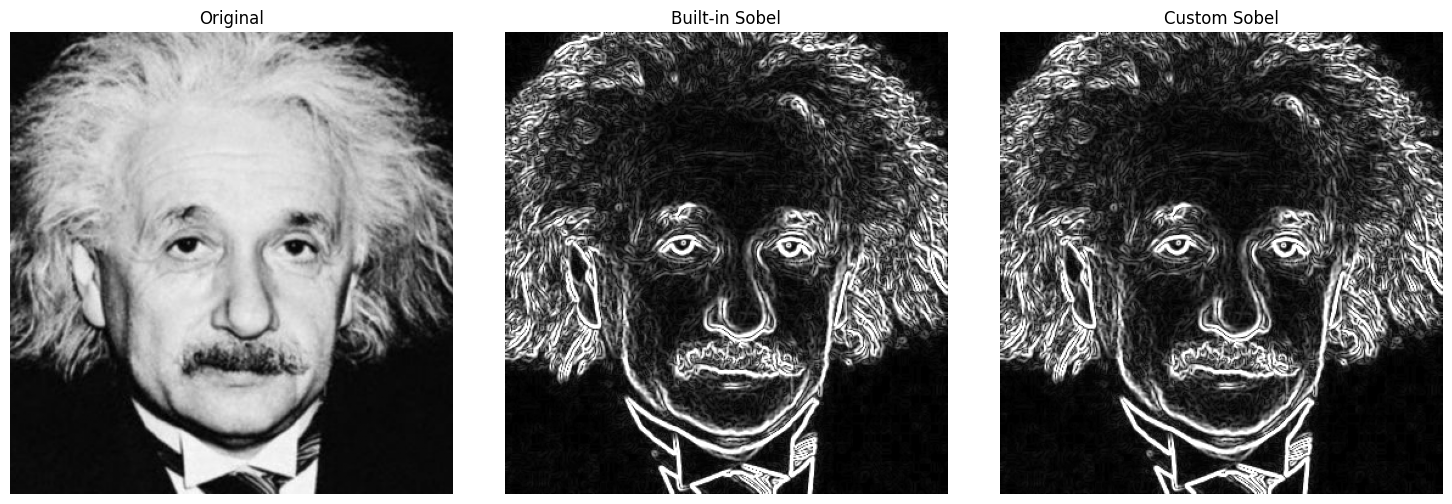

In [ ]:
# Q6 – Sobel Filtering (a: OpenCV, b: manual kernels, c: compare)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "einstein.png"
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(img_path)

# built in 
grad_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)  
mag_cv = np.hypot(grad_x, grad_y)                        
sobel_cv = cv2.convertScaleAbs(mag_cv)

# custom
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]], dtype=np.float32)

kernel_y = np.array([[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]], dtype=np.float32)

resp_x = cv2.filter2D(img_gray, cv2.CV_64F, kernel_x)
resp_y = cv2.filter2D(img_gray, cv2.CV_64F, kernel_y)
mag_manual = np.hypot(resp_x, resp_y)
sobel_manual = cv2.convertScaleAbs(mag_manual)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap="gray");      plt.title("Input Image");    plt.axis("off")
plt.subplot(1,3,2); plt.imshow(sobel_cv, cmap="gray");      plt.title("Sobel (OpenCV)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(sobel_manual, cmap="gray");  plt.title("Sobel (Manual)"); plt.axis("off")
plt.tight_layout(); plt.show()
